# Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def overview_plot(df, plot_dict, suptitle, time_range=None, figsize=(12, 20)):
    """
    Generates an overview plot with multiple subplots based on the provided data and plot configuration.
    Parameters:
    df (pandas.DataFrame): The data frame containing the data to be plotted. It must include a 'time_seconds' column.
    plot_dict (dict): A dictionary where keys are subplot titles and values are lists of column names to be plotted in each subplot.
    suptitle (str): The main title for the entire figure.
    time_range (tuple, optional): A tuple specifying the start and end time in seconds to filter the data. Defaults to None.
    figsize (tuple, optional): A tuple specifying the size of the figure. Defaults to (12, 20).
    Returns:
    None
    """

    # Set the font to Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    
    # Create a figure and a set of subplots
    fig, axes = plt.subplots(len(plot_dict), 1, figsize=figsize, sharex=True)
    
    if len(plot_dict) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    # Add a suptitle to the figure
    fig.suptitle(suptitle, fontsize=16)

    # Apply time range if specified
    if time_range:
        df = df[(df['time_seconds'] >= time_range[0]) & (df['time_seconds'] <= time_range[1])]

    for ax, (title, columns) in zip(axes, plot_dict.items()):
        for column in columns:
            ax.scatter(df['time_seconds'], df[column], label=column.replace('_', ' '), marker='.')

        # Set the title of the subplot
        ax.set_title(title)

        # Add y-axis units based on specific strings in the title
        if 'Torque' in title:
            ax.set_ylabel('[Nm]')
        elif 'Force' in title:
            ax.set_ylabel('[N]')
        elif 'Velocity' in title:
            ax.set_ylabel('[m/s]' if 'Track' in title else '[rad/s]')
        elif 'angle' in title:
            ax.set_ylabel('[rad]')
        else:
            ax.set_ylabel('')
        
        # if 'Track Velocity' in title:
        #     ax.set_ylim(-32, 2)
        # if 'Tail Torque' in title:
        #     ax.set_ylim(-200, 200)
        # if 'Torques on Body' in title:
        #     ax.set_ylim(-2, 2)

        # Add legend to the subplot
        ax.legend()
        ax.grid()

    # Set the x-axis label
    axes[-1].set_xlabel('Time [s]')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for suptitle
    plt.show()



# Debug

## FF Approach

In [11]:
df_ff.columns

Index(['time_seconds', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'TrackDrive_friction',
       'TrackDrive_damping', 'TrackDrive_stiffness',
       'TrackDrive_position_setpoint', 'TrackDrive_velocity_setpoint',
       'TrackDrive_effort_setpoint', 'TrackDrive_effort_measured',
       'TrackDrive_effort_applied', 'TrackDrive_position',
       'TrackDrive_velocity', 'Track_position_x', 'Track_position_y',
       'Track_position_z', 'Track_velocity_x', 'Track_velocity_y',
       'Track_velocity_z', 'Track_acceleration_x', 'Track_acceleration_y',
       'Track_acceleration_z', 'Track_angular_velocity_x',
       'Track_angular_velocity_y', 'Track_angular_velocity_z',
       'Track_angular_acceleration_x', 'Track_angular_acceleration_y',
       'Track

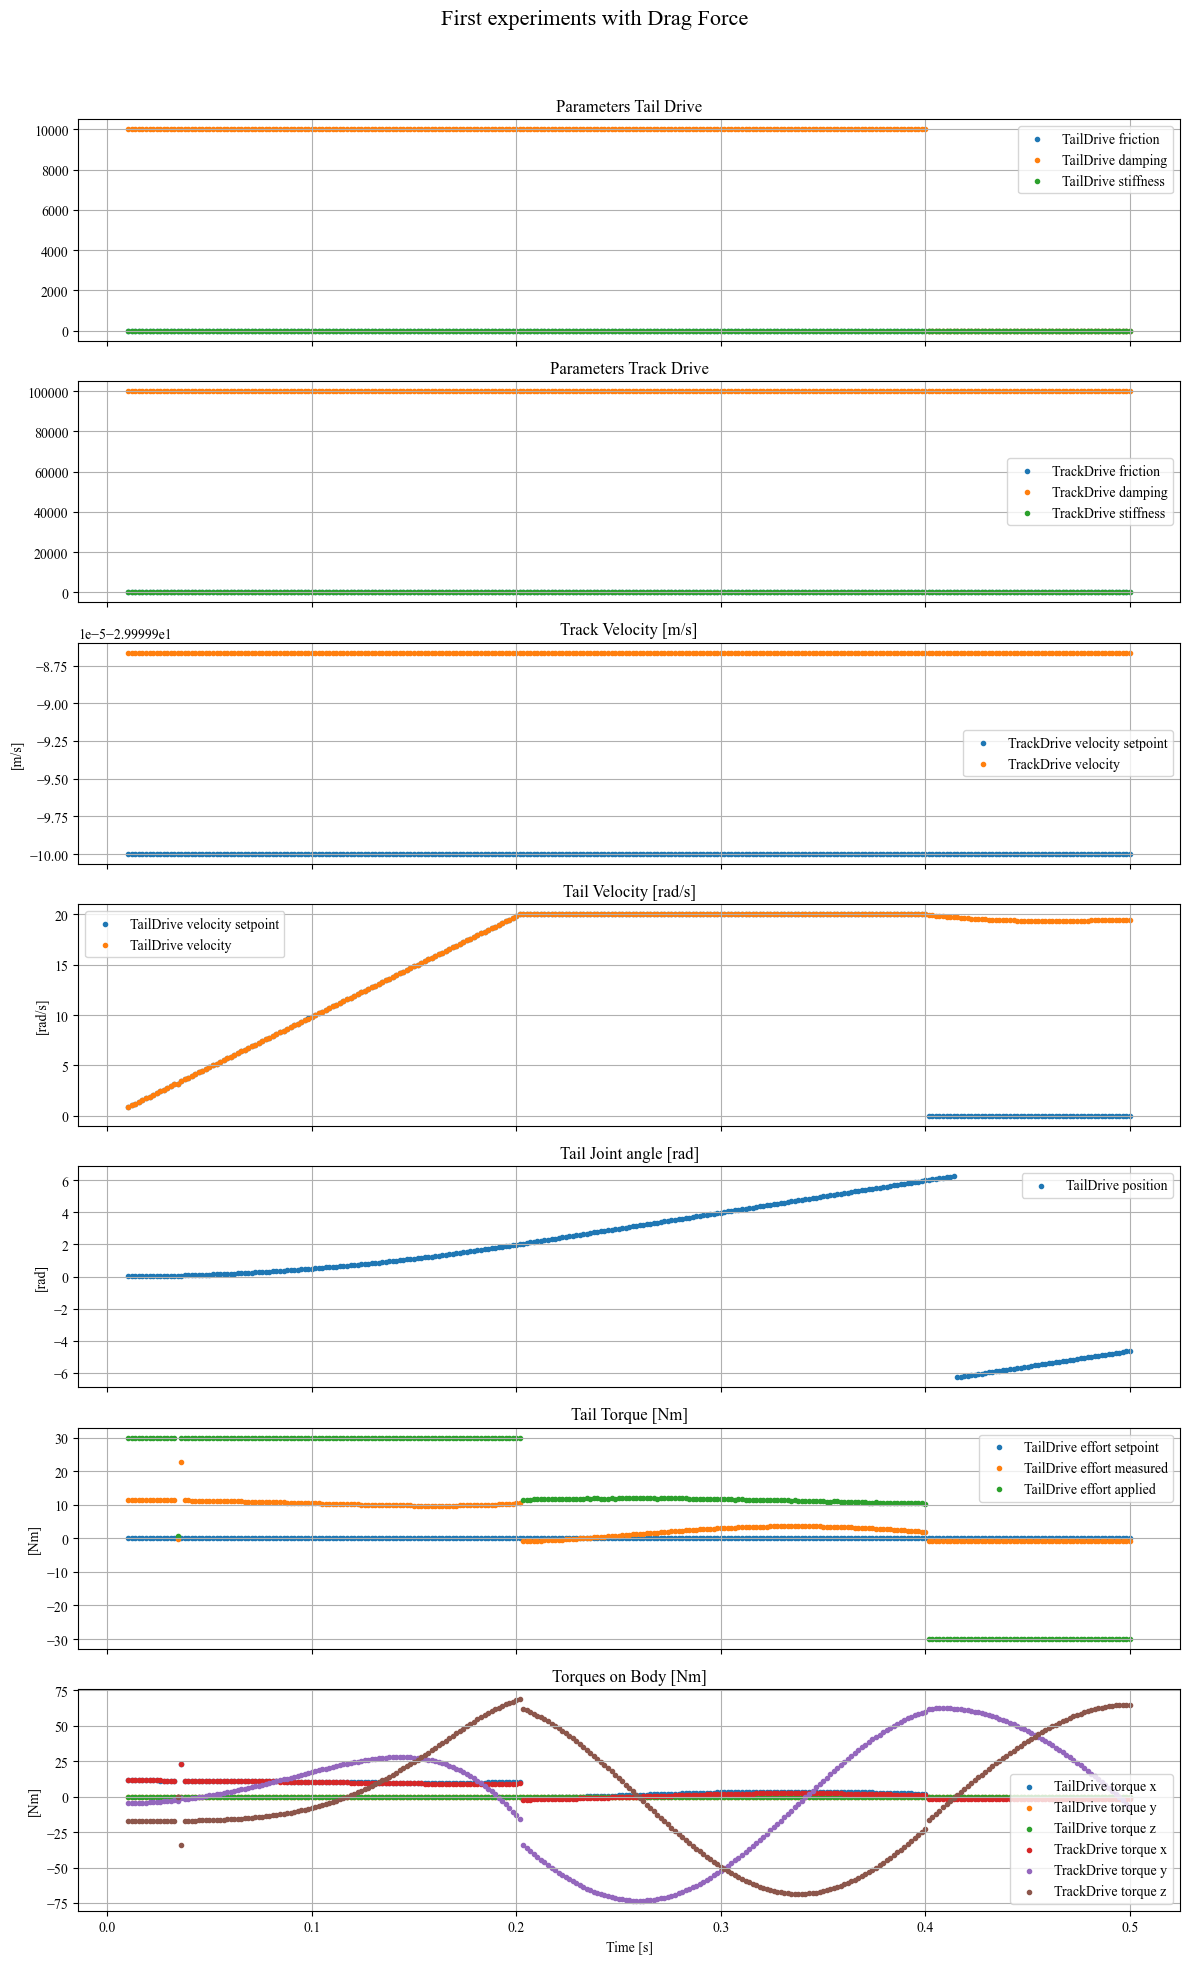

In [12]:
df_ff = pd.read_csv('results/FFDrag_FF_enabled.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Parameters Track Drive": ["TrackDrive_friction", "TrackDrive_damping", "TrackDrive_stiffness"],
    "Track Velocity [m/s]": ["TrackDrive_velocity_setpoint", "TrackDrive_velocity"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "TrackDrive_torque_x", "TrackDrive_torque_y", "TrackDrive_torque_z"],
}
plot_data(df_ff, stuff_to_plot, "First experiments with Drag Force", time_range=(0.01, 1))

## Analytical Approach

Index(['time_seconds', 'Wind torque magnitude', 'F_sub_x', 'F_sub_y',
       'F_sub_z', 'F_total', 'F_applied?', 'A_tilde', 'Wind_x', 'Wind_y',
       'Wind_z', 'TailDrive_friction', 'TailDrive_damping',
       'TailDrive_stiffness', 'TailDrive_position_setpoint',
       'TailDrive_velocity_setpoint', 'TailDrive_effort_setpoint',
       'TailDrive_effort_measured', 'TailDrive_effort_applied',
       'TailDrive_position', 'TailDrive_velocity', 'Root_Body_position_x',
       'Root_Body_position_y', 'Root_Body_position_z', 'Root_Body_velocity_x',
       'Root_Body_velocity_y', 'Root_Body_velocity_z',
       'Root_Body_acceleration_x', 'Root_Body_acceleration_y',
       'Root_Body_acceleration_z', 'Root_Body_angular_velocity_x',
       'Root_Body_angular_velocity_y', 'Root_Body_angular_velocity_z',
       'Root_Body_angular_acceleration_x', 'Root_Body_angular_acceleration_y',
       'Root_Body_angular_acceleration_z', 'Body_position_x',
       'Body_position_y', 'Body_position_z', 'Body_ve

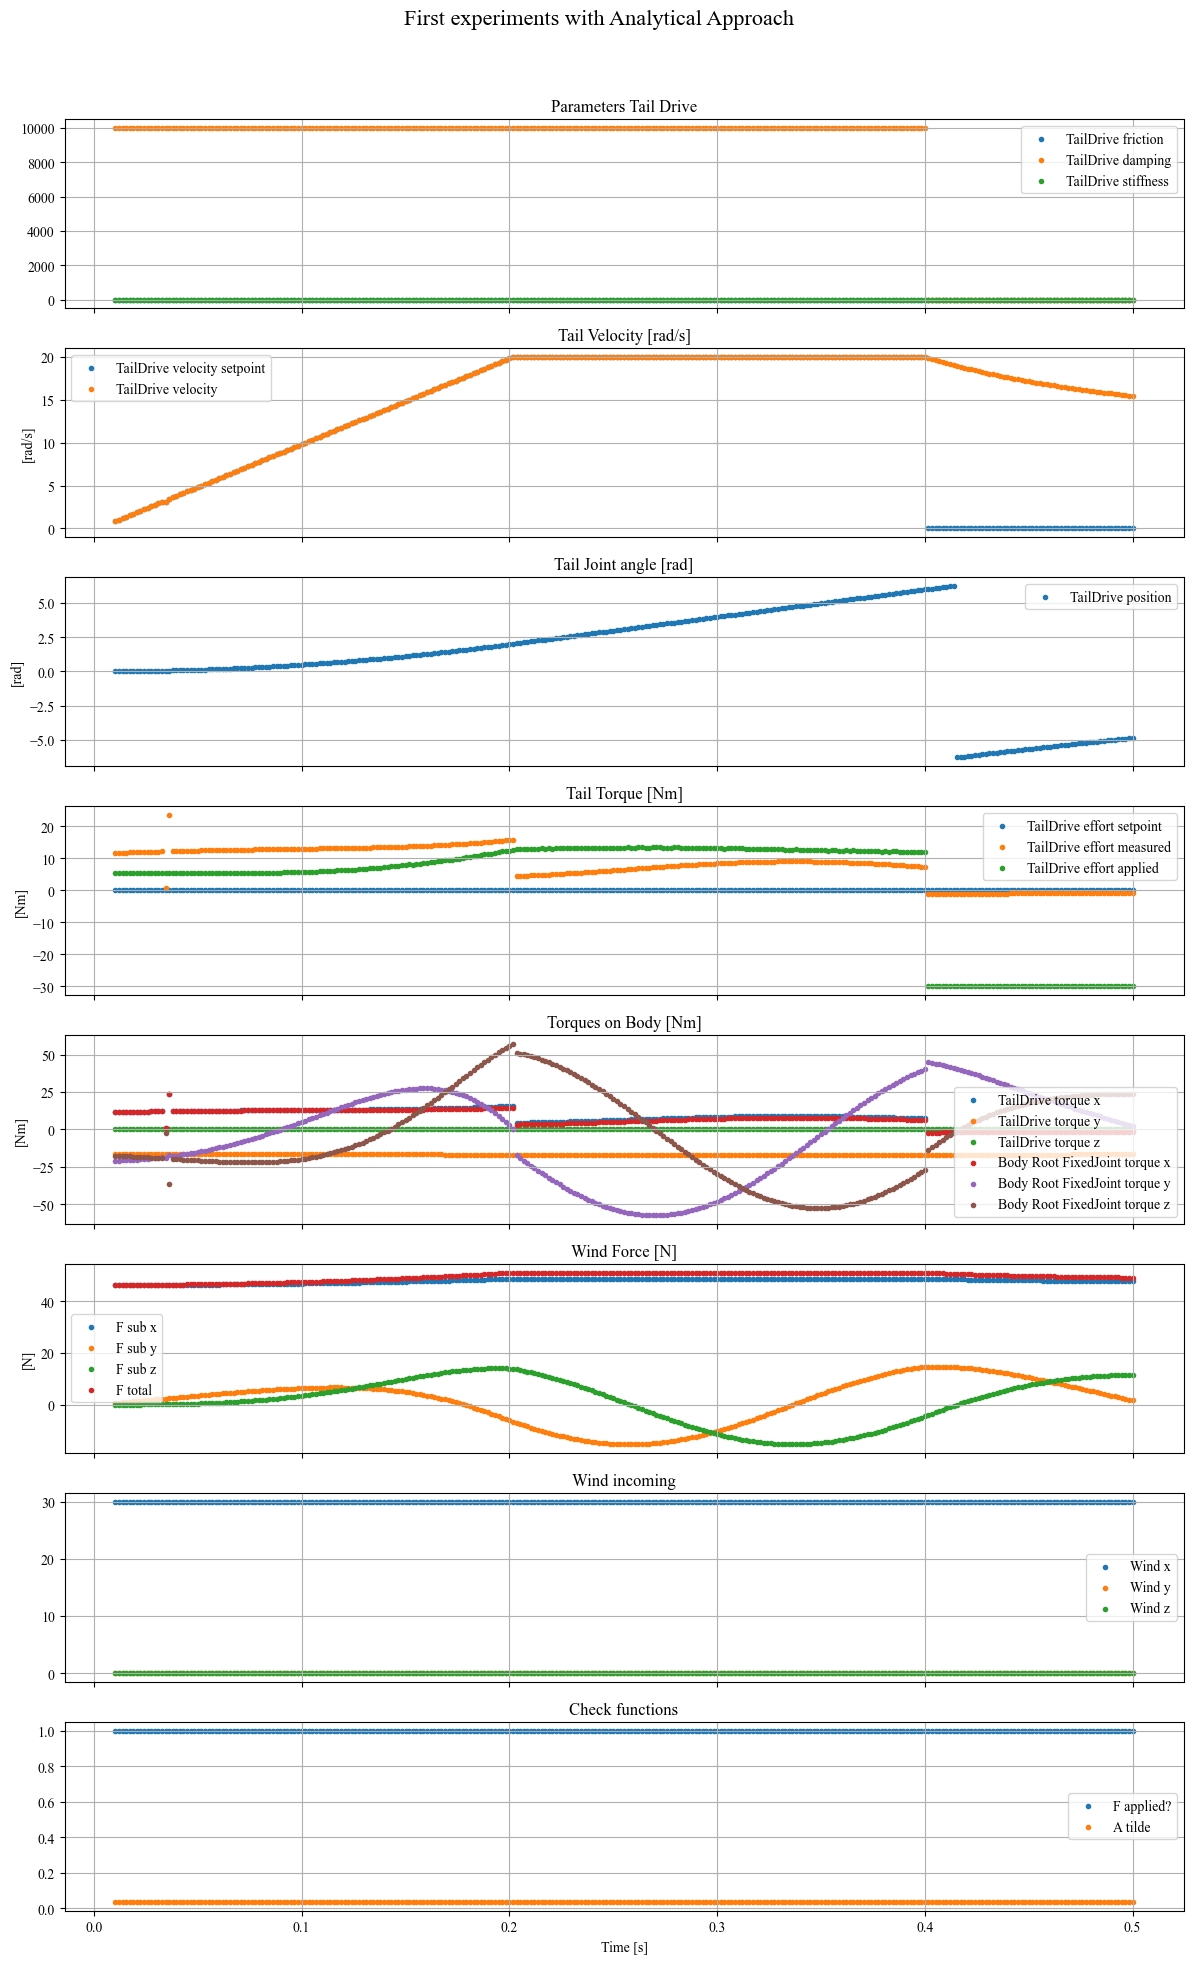

In [16]:
## Analytical Approach
df_an = pd.read_csv('results/AnalyticalApproach_Forces_applied.csv')
stuff_to_plot = {
    "Parameters Tail Drive": ["TailDrive_friction", "TailDrive_damping", "TailDrive_stiffness"],
    "Tail Velocity [rad/s]": ["TailDrive_velocity_setpoint", "TailDrive_velocity"],
    "Tail Joint angle [rad]": ["TailDrive_position"],
    "Tail Torque [Nm]": ["TailDrive_effort_setpoint", "TailDrive_effort_measured", "TailDrive_effort_applied"],
    "Torques on Body [Nm]": ["TailDrive_torque_x", "TailDrive_torque_y", "TailDrive_torque_z", "Body_Root_FixedJoint_torque_x", "Body_Root_FixedJoint_torque_y", "Body_Root_FixedJoint_torque_z"],
    "Wind Force [N]": ["F_sub_x", "F_sub_y", "F_sub_z", "F_total"],
    "Wind incoming": ["Wind_x", "Wind_y", "Wind_z"],
    "Check functions": ["F_applied?", "A_tilde"],
}
print(df_an.columns)
plot_data(df_an, stuff_to_plot, "First experiments with Analytical Approach", time_range=(0.01, 1))

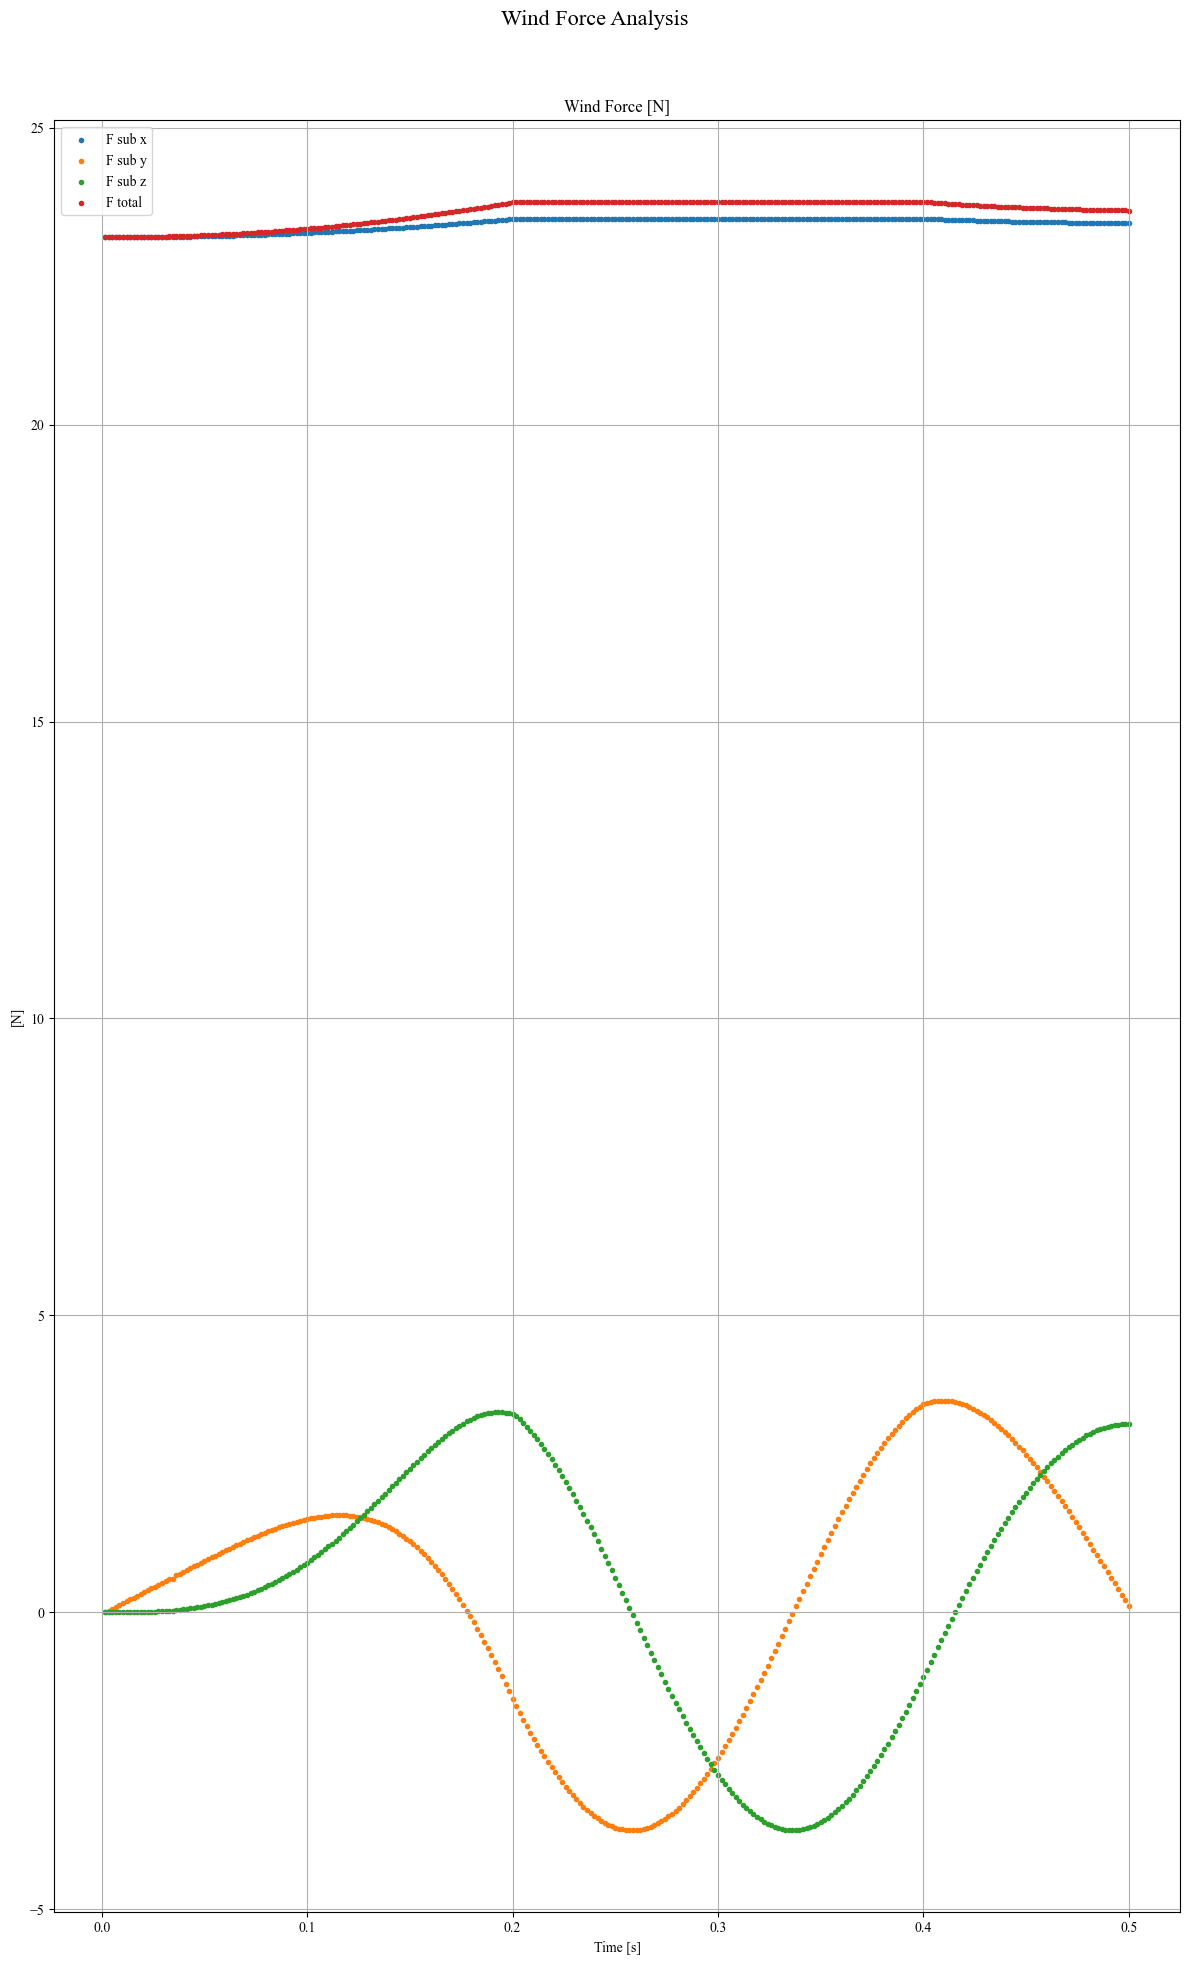

In [9]:
# Define the columns to plot
columns_to_plot = {
    "Wind Force [N]": ["F_sub_x", "F_sub_y", "F_sub_z", "F_total"]
}

# Plot the data
plot_data(df_an, columns_to_plot, "Wind Force Analysis", time_range=(0, 1))